In [434]:
# Importing Libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, LabelEncoder, MultiLabelBinarizer
warnings.filterwarnings('ignore')

In [436]:
df = pd.read_csv("C:/Users/tusha/Downloads/Recommendation System/Recommendation System/anime.csv")

In [438]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [440]:
df.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [442]:
df= df.sort_values(by='anime_id',ascending=True)
df.head(5)

,anime_id,name,genre,type,episodes,rating,members
22,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,8.82,486824
152,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,8.40,137636
214,6,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
2095,7,Witch Hunter Robin,"Action, Drama, Magic, Mystery, Police, Superna...",TV,26,7.36,64905
3159,8,Beet the Vandel Buster,"Adventure, Fantasy, Shounen, Supernatural",TV,52,7.06,9848


In [444]:
df.shape

(12294, 7)

In [446]:
df.isna().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [449]:
df["genre"].fillna("Unknown", inplace=True)  # Fill missing genres with "Unknown"
df["type"].fillna("Unknown", inplace=True)  # Fill missing types with "Unknown"
df["rating"].fillna(df["rating"].mean(), inplace=True)

In [451]:
df.isna().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [453]:
df.shape

(12294, 7)

In [455]:
df.duplicated().sum()

0

### we can see that there is no dublicate value

In [458]:
df['genre'].nunique()

3265

In [460]:
genre_df= df['genre'].unique()

In [462]:
genre_df

array(['Action, Adventure, Comedy, Drama, Sci-Fi, Space',
       'Action, Drama, Mystery, Sci-Fi, Space', 'Action, Comedy, Sci-Fi',
       ..., 'Action, Fantasy, Super Power, Supernatural, Vampire',
       'Action, Adventure, Fantasy, Game, Kids',
       'Comedy, Fantasy, Slice of Life, Supernatural'], dtype=object)

In [464]:
df.describe()

,anime_id,rating,members
count,12294.000000,12294.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.017096,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.900000,2.250000e+02
50%,10260.500000,6.550000,1.550000e+03
75%,24794.500000,7.170000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


### We can see that the minimum rating score is 1.67 and the maximum rating score is 10. The minimum members is 5 and the maximum is 1,013,917.

In [467]:
type_values = df['type'].value_counts()
print(type_values)

type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Unknown      25
Name: count, dtype: int64


In [469]:
type_cat=df['type'].unique()

### Most anime are broadcast of the TV, followed by OVA.

([<matplotlib.patches.Wedge at 0x1db2fb65730>,
 [Text(-0.9059572991522516, 0.6238921157642224, 'TV'),
  Text(-0.38755720654327114, -1.0294655951785745, 'Movie'),
  Text(0.9732671139876605, -0.5125925524528527, 'OVA'),
  Text(0.9414768011372312, 0.5688773443550083, 'Special'),
  Text(0.4591403339258186, 0.999594994866665, 'ONA'),
  Text(0.15075176626121053, 1.0896209914319408, 'Music'),
  Text(0.007027168214030716, 1.099977553819573, 'Unknown')],
 [Text(-0.494158526810319, 0.3403047904168485, '30.8%\n(3787)'),
  Text(-0.2113948399326933, -0.5615266882792224, '26.9%\n(3311)'),
  Text(0.5308729712659965, -0.279595937701556, '19.1%\n(2348)'),
  Text(0.5135328006203078, 0.31029673328454993, '13.6%\n(1676)'),
  Text(0.2504401821413556, 0.5452336335636354, '5.4%\n(659)'),
  Text(0.08222823614247846, 0.5943387225992404, '4.0%\n(488)'),
  Text(0.0038330008440167537, 0.599987756628858, '0.2%\n(25)')])

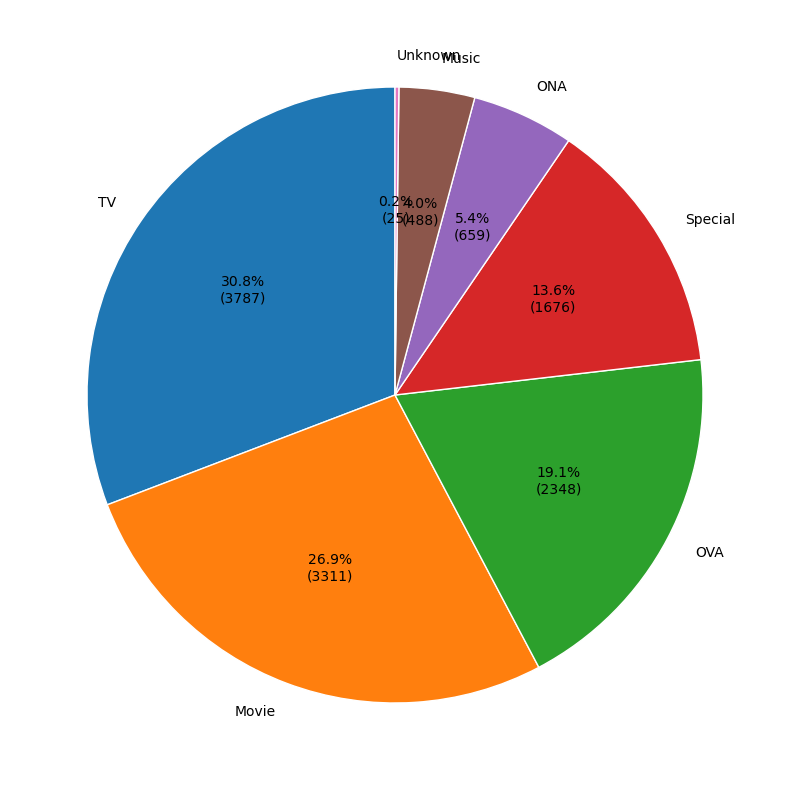

In [472]:

def autopct_format(pct, all_values):
    absolute = int(round(pct/100. * sum(all_values)))  # Convert percentage to absolute count
    return f"{pct:.1f}%\n({absolute})"

plt.figure(figsize=(10,10))
plt.pie(x=type_values, labels=type_cat, autopct=lambda pct: autopct_format(pct, type_values), startangle=90, wedgeprops={'edgecolor': 'white'})

#plt.pie(x=type_values,data=df,labels=type_cat)


### Plot the distribution of ratings

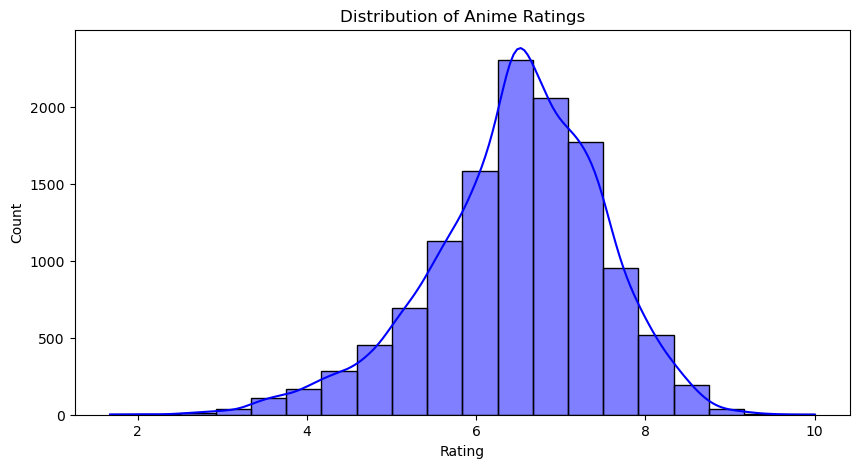

In [475]:
plt.figure(figsize=(10, 5))
sns.histplot(df['rating'], bins=20, kde=True, color='blue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Anime Ratings')
plt.show()

### Most Popular Anime by Members

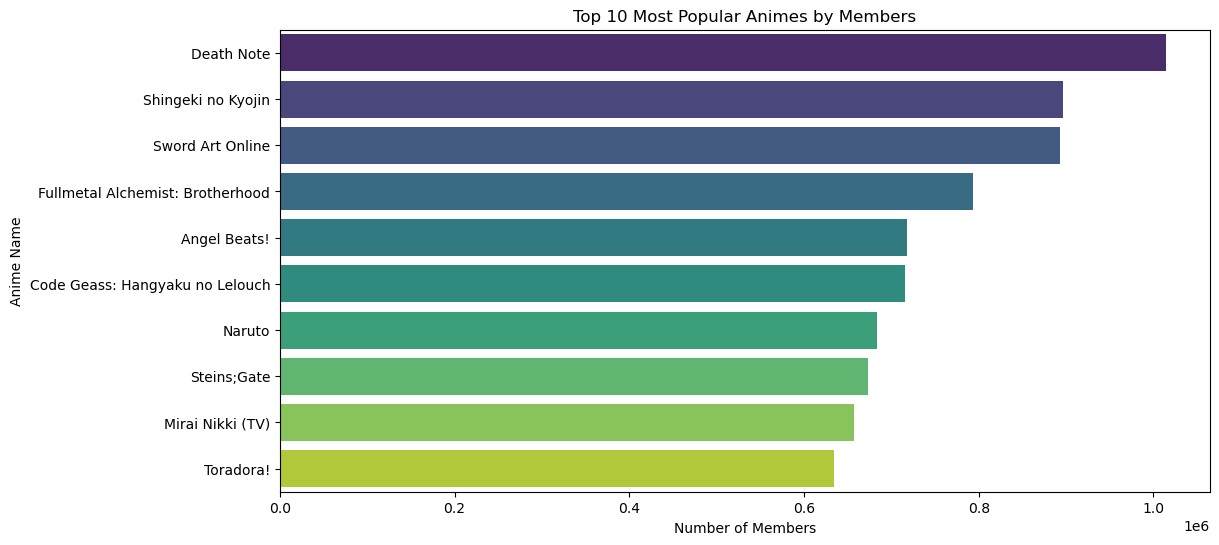

In [478]:
top_anime = df.sort_values(by="members", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_anime["members"], y=top_anime["name"], palette="viridis")
plt.xlabel("Number of Members")
plt.ylabel("Anime Name")
plt.title("Top 10 Most Popular Animes by Members")
plt.show()

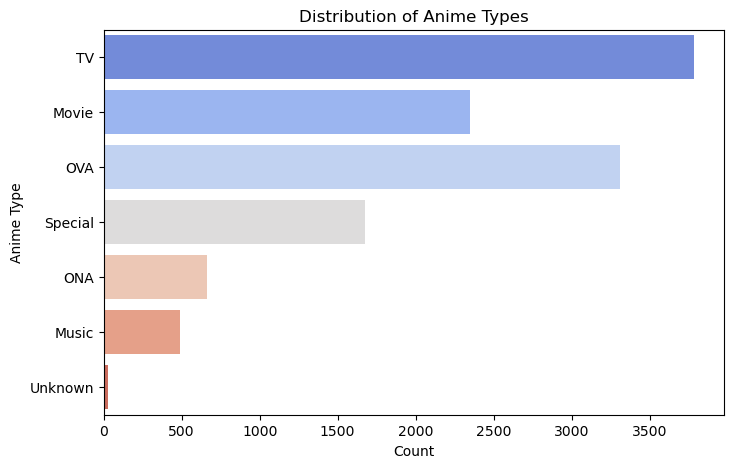

In [489]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df["type"], palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Anime Type")
plt.title("Distribution of Anime Types")
plt.show()

In [491]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer






# Normalize numerical features
scaler = MinMaxScaler()
df[["rating", "members"]] = scaler.fit_transform(df[["rating", "members"]])

# Convert 'genre' into a numerical representation using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
genre_tfidf = vectorizer.fit_transform(df["genre"])

# Convert 'type' into one-hot encoding
type_dummies = pd.get_dummies(df["type"])

# Combine all processed features
import scipy.sparse as sp
import numpy as np

features = sp.hstack([genre_tfidf, type_dummies, df[["rating", "members"]].values], format="csr")

# Print shape of final feature matrix
print("Final feature matrix shape:", features.shape)


Final feature matrix shape: (12294, 56)


In [493]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numerical features
scaler = MinMaxScaler()
df[["rating", "members"]] = scaler.fit_transform(df[["rating", "members"]])


 ### Function to Recommend Anime

In [496]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_anime(anime_name, df, features, top_n=5):
    """
    Recommends similar anime based on cosine similarity.

    Parameters:
        anime_name (str): Name of the anime for which recommendations are needed.
        df (pd.DataFrame): The original dataset containing anime details.
        features (sparse matrix): Preprocessed feature matrix.
        top_n (int): Number of recommendations to return.

    Returns:
        List of recommended anime.
    """
    # Get the index of the given anime
    idx = df[df["name"].str.lower() == anime_name.lower()].index

    if len(idx) == 0:
        return "Anime not found in the dataset."

    idx = idx[0]

    # Compute cosine similarity with all anime
    similarity_scores = cosine_similarity(features[idx], features).flatten()

    # Get indices of top similar anime (excluding itself)
    similar_indices = np.argsort(similarity_scores)[::-1][1:top_n+1]

    # Get the recommended anime names
    recommended_anime = df.iloc[similar_indices][["name", "rating"]]

    return recommended_anime

# Example usage:
anime_to_search = "Steins;Gate"  # Change this to any anime name
recommendations = recommend_anime(anime_to_search, df, features, top_n=5)
print(recommendations)





                                                   name    rating
2691                  Yakushiji Ryouko no Kaiki Jikenbo  0.662665
5322  Gyakuten Saiban: Sono &quot;Shinjitsu&quot;, I...  0.578631
4513                                             Tokkou  0.605042
4948                             L/R: Licensed by Royal  0.590636
739                                     Tantei Gakuen Q  0.744298



### Given a target anime, recommend a list of similar anime based on cosine similarity scores.


In [499]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def recommend_anime(anime_name, df, features, top_n=5):
    """
    Recommends similar anime based on cosine similarity.

    Parameters:
        anime_name (str): Name of the anime for which recommendations are needed.
        df (pd.DataFrame): The original dataset containing anime details.
        features (sparse matrix): Preprocessed feature matrix.
        top_n (int): Number of recommendations to return.

    Returns:
        DataFrame with recommended anime names and similarity scores.
    """
    # Get the index of the given anime
    idx = df[df["name"].str.lower() == anime_name.lower()].index

    if len(idx) == 0:
        return "Anime not found in the dataset."

    idx = idx[0]

    # Compute cosine similarity with all anime
    similarity_scores = cosine_similarity(features[idx], features).flatten()

    # Get indices of top similar anime (excluding itself)
    similar_indices = np.argsort(similarity_scores)[::-1][1:top_n+1]

    # Get the recommended anime names and similarity scores
    recommended_anime = df.iloc[similar_indices][["name", "rating"]].copy()
    recommended_anime["similarity_score"] = similarity_scores[similar_indices]

    return recommended_anime

# Example usage: Recommend similar anime for "Steins;Gate"
anime_to_search = "Steins;Gate"
recommendations = recommend_anime(anime_to_search, df, features, top_n=5)
print(recommendations)





                                                   name    rating  \
2691                  Yakushiji Ryouko no Kaiki Jikenbo  0.662665   
5322  Gyakuten Saiban: Sono &quot;Shinjitsu&quot;, I...  0.578631   
4513                                             Tokkou  0.605042   
4948                             L/R: Licensed by Royal  0.590636   
739                                     Tantei Gakuen Q  0.744298   

      similarity_score  
2691          0.924536  
5322          0.897210  
4513          0.886739  
4948          0.882508  
739           0.881526  


### Experiment with different threshold values for similarity scores to adjust the recommendation list size.

In [502]:
def recommend_anime_threshold(anime_name, df, features, similarity_threshold=0.8):
    """
    Recommends similar anime based on a cosine similarity threshold.

    Parameters:
        anime_name (str): Name of the anime for which recommendations are needed.
        df (pd.DataFrame): The original dataset containing anime details.
        features (sparse matrix): Preprocessed feature matrix.
        similarity_threshold (float): Minimum similarity score to include in the recommendations.

    Returns:
        DataFrame with recommended anime names and similarity scores.
    """
    # Get the index of the given anime
    idx = df[df["name"].str.lower() == anime_name.lower()].index

    if len(idx) == 0:
        return "Anime not found in the dataset."

    idx = idx[0]

    # Compute cosine similarity with all anime
    similarity_scores = cosine_similarity(features[idx], features).flatten()

    # Get indices of anime that meet the threshold
    similar_indices = np.where(similarity_scores >= similarity_threshold)[0]

    # Exclude the target anime itself
    similar_indices = similar_indices[similar_indices != idx]

    # Get the recommended anime names and similarity scores
    recommended_anime = df.iloc[similar_indices][["name", "rating"]].copy()
    recommended_anime["similarity_score"] = similarity_scores[similar_indices]

    # Sort recommendations by similarity score in descending order
    recommended_anime = recommended_anime.sort_values(by="similarity_score", ascending=False)

    return recommended_anime

# Example usage: Adjust similarity threshold to get different recommendation list sizes
anime_to_search = "Steins;Gate"
threshold = 0.85  # Change this value to experiment
recommendations_with_threshold = recommend_anime_threshold(anime_to_search, df, features, similarity_threshold=threshold)

# Display the recommendations
recommendations_with_threshold



,name,rating,similarity_score
2691,Yakushiji Ryouko no Kaiki Jikenbo,0.662665,0.924536
5322,"Gyakuten Saiban: Sono &quot;Shinjitsu&quot;, I...",0.578631,0.897210
4513,Tokkou,0.605042,0.886739
4948,L/R: Licensed by Royal,0.590636,0.882508
739,Tantei Gakuen Q,0.744298,0.881526
4027,Kaiketsu Jouki Tanteidan,0.618247,0.870328
275,Durarara!!x2 Ketsu,0.787515,0.861697
391,Durarara!!x2 Ten,0.774310,0.861286
360,Durarara!!x2 Shou,0.777911,0.859829
1867,Matantei Loki Ragnarok,0.690276,0.853049


### Code to Split Dataset

In [505]:
from sklearn.model_selection import train_test_split

# Splitting dataset into 80% training and 20% testing
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Display dataset sizes
print("Training set size:", train_df.shape[0])
print("Testing set size:", test_df.shape[0])




Training set size: 9835
Testing set size: 2459


### Evaluating the Anime Recommendation System
#### To evaluate the performance of your anime recommendation system, we can use Precision, Recall, and F1-Score

In [508]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_recommendation_system(test_df, df, features, top_n=5):
    """
    Evaluates the recommendation system using precision, recall, and F1-score.

    Parameters:
        test_df (pd.DataFrame): The test dataset.
        df (pd.DataFrame): The full dataset.
        features (sparse matrix): Feature matrix used for similarity.
        top_n (int): Number of recommendations per anime.

    Returns:
        Precision, Recall, and F1-score.
    """
    actual_liked_anime = []  # List of anime that users actually liked
    predicted_recommendations = []  # List of anime recommended by the system

    for anime_name in test_df["name"]:
        recommendations = recommend_anime(anime_name, df, features, top_n)

        if isinstance(recommendations, str):
            continue  # Skip if anime is not found

        actual_liked_anime.append(anime_name)
        predicted_recommendations.append(recommendations["name"].tolist())

    # Convert to binary format for evaluation
    y_true = [1 if anime in actual_liked_anime else 0 for sublist in predicted_recommendations for anime in sublist]
    y_pred = [1] * len(y_true)  # Since all recommendations are "positive" cases

    # Compute evaluation metrics
    precision = precision_score(y_true, y_pred, average="binary")
    recall = recall_score(y_true, y_pred, average="binary")
    f1 = f1_score(y_true, y_pred, average="binary")

    return precision, recall, f1

# Run evaluation
precision, recall, f1 = evaluate_recommendation_system(test_df, df, features, top_n=5)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)




Precision: 0.19959333062220413
Recall: 1.0
F1-score: 0.3327683232761543


# Performance Analysis of the Recommendation System
## 1. Understanding the Metrics:
### From your evaluation results:

### Precision = 0.1996 (~20%) → Only 20% of recommended anime are actually relevant.

### Recall = 1.0 (100%) → The system retrieves all relevant anime.

### F1-score = 0.3328 (~33%) → The overall balance between precision and recall is quite low.

## 2. Observations:
### High recall (1.0) but low precision (0.2) suggests that the system retrieves too many recommendations, but most of them aren’t highly relevant.

### F1-score is low, meaning the balance between precision and recall isn’t ideal

## Interview Question

### 1. Can you explain the difference between user-based and item-based collaborative filtering?

## User-Based Collaborative Filtering (UBCF)
### Concept: Finds similar users and recommends anime liked by those users.

### Pros: Personalized recommendations, works well with rich user data.

### Cons: Cold start for new users, computationally expensive for large user bases.

## Item-Based Collaborative Filtering (IBCF)
### Concept: Finds similar anime based on user interactions and recommends anime that are frequently watched/rated together.

### Pros: More scalable, no cold start for users.

### Cons: Cold start for new anime, can overfit to popular anime.

## 2. What is collaborative filtering, and how does it work?

 ### What is Collaborative Filtering?
#### Collaborative Filtering (CF) is a recommendation technique that suggests items based on past interactions of users. It assumes that users with similar tastes in the past will have similar preferences in the future.

### How Does It Work?
#### Collect User-Item Interaction Data (e.g., anime ratings, watch history).

#### Find Similar Users or Items based on interactions (using similarity measures like cosine similarity or Pearson correlation).

#### Make Predictions by recommending items that similar users or items interacted with but the target user hasn’t seen yet.